Learn on how to build and optimize model with **gradient boosting.**

#Introduction
By definition, **ensemble methods** combine the predictions of several models (e.g., several trees, in the case of random forest).

Now, we'll learn about another ensemble method called gradient boosting.

#Difference of Decision Tree, Random Forest, and XGBoost

1. Decision Tree:
A decision tree is a simple and interpretable model that recursively splits the data into subsets based on the feature values. It forms a tree-like structure where each internal node represents a test on a feature, each branch represents the outcome of that test, and each leaf node represents the final prediction. The decision tree makes binary decisions at each node to split the data. It is prone to overfitting, especially when the tree becomes deep, capturing noise and leading to poor generalization on unseen data.

2. Random Forest:
Random Forest is an ensemble learning method that builds multiple decision trees and combines their predictions through voting (for classification) or averaging (for regression). Each decision tree is trained on a random subset of the data (bootstrap sample) and a random subset of the features. This randomness reduces overfitting and increases the model's ability to generalize to new data.

3. XGBoost (Extreme Gradient Boosting):
XGBoost is an optimized implementation of the Gradient Boosting algorithm. It creates an ensemble of weak learners (usually shallow decision trees) sequentially, where each new model corrects the errors made by the previous one. XGBoost uses a gradient-based optimization algorithm to minimize a loss function while adding new trees to the ensemble. It also includes regularization terms to control overfitting and speed up the training process. XGBoost is known for its high performance, scalability, and efficiency, making it popular in various machine learning competitions and real-world applications.
**XGBoost** is an implementation of gradient boosting with several additional features focused on perfmance and speed. The final result of an XGBoost model is a weighted sum of the predictions made by all the individual trees in the sequence. The contribution of each tree is adjusted during training based on how well it reduces the overall error.


Note:

* Regularization (penyederhanaan): XGBoost introduces regularization terms to control overfitting during the training process. Regularization helps prevent the model from becoming too complex and ensures better generalization to unseen data.


#Gradient Boosting

**Gradient boosting** is a method that goes through cycles to iteratively add models into an ensemble (setelan).

It begins by initializing the ensemble with a single model, whose predictions can be pretty naive. (Even if its predictions are wildly inaccurate, subsequent (kemudian) additions to the ensemble will address those errors.)

Then, we start the cycle:
1. First, we use the current ensemble to generate predictions for each observation in the dataset. To make a prediction, we **add the predictions from all models** in the ensemble.
2. These predictions are used to calculate a loss function (like mean squared error, for instance).
3. Then, we use the loss function to fit a new model that will be added to the ensemble. Specifically, we determine model parameters so that adding this new model to the ensemble will reduce the loss.
4. Finally, we add the new model to ensemble, and ...
5. Repeat!

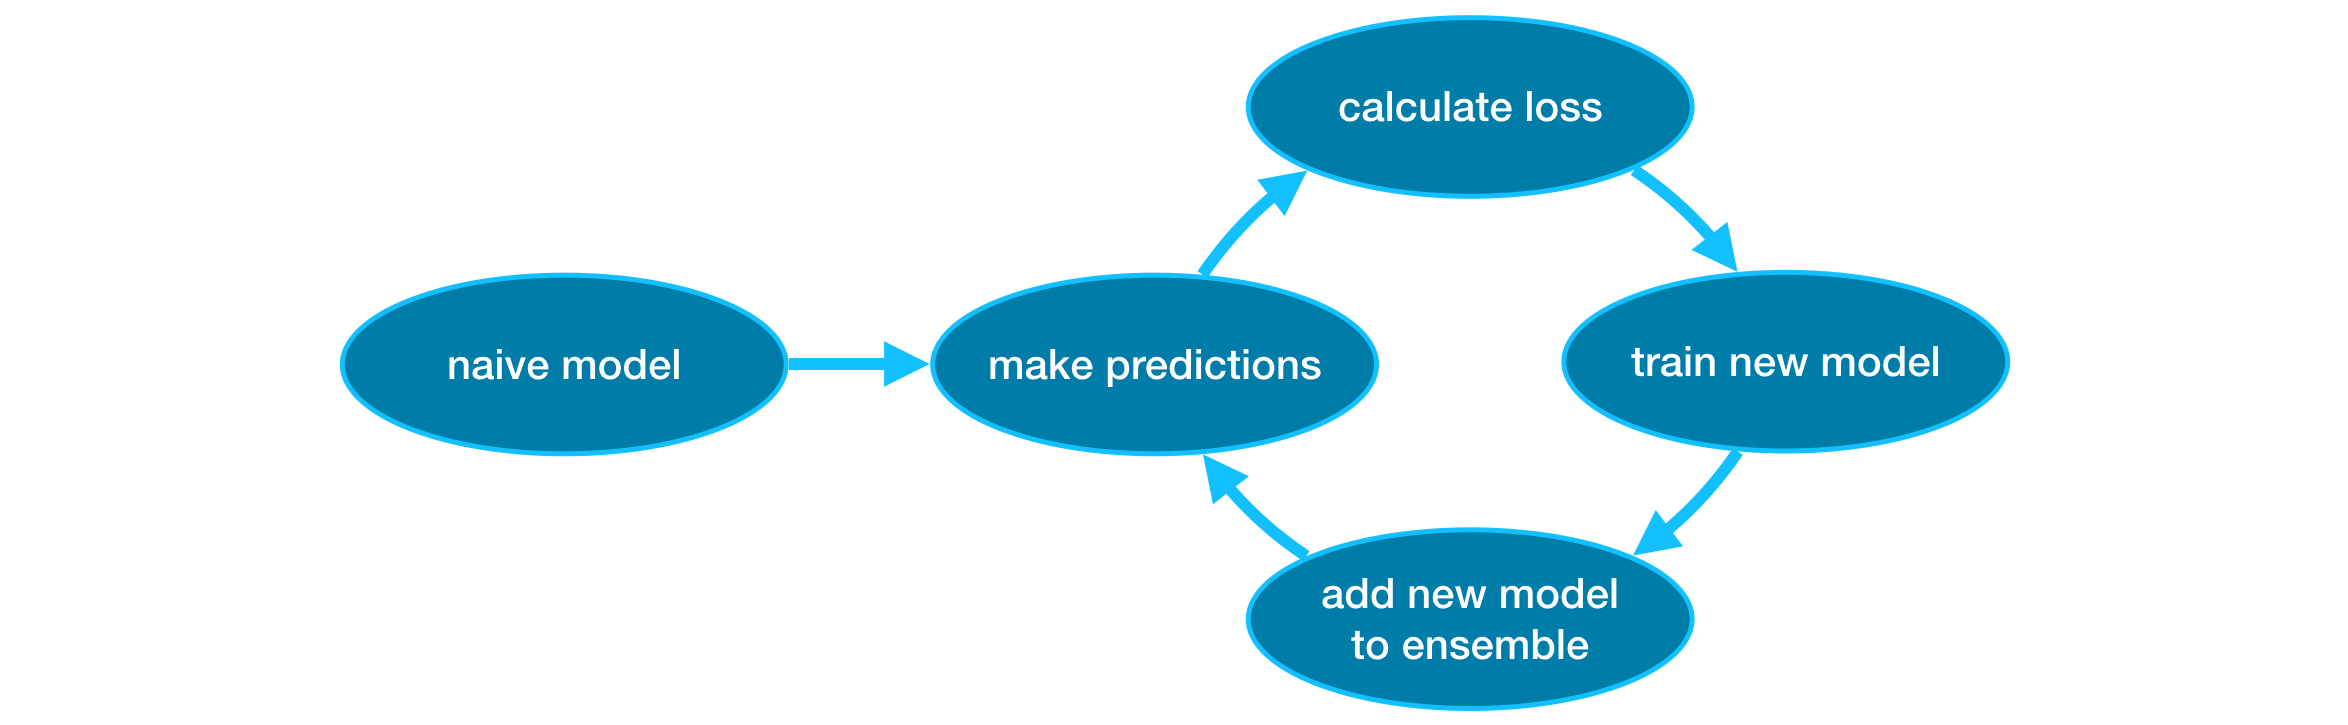

#Example
We begin by loading the training and validation data in X_train, X_valid, y_train, y_valid.

In [1]:
!pip install shap

In [2]:
!pip install -U xgboost

In [8]:
import pandas as pd
import numpy as np #Digunakan untuk melakukan perhitungan matematis dan pengelolaan array.
from sklearn.model_selection import train_test_split #Fungsi untuk membagi data menjadi set pelatihan dan pengujian.
from sklearn.metrics import mean_absolute_error #Digunakan untuk mengukur tingkat kesalahan model dalam prediksi.
import xgboost as xgb #Pustaka untuk membangun model prediksi yang cepat dan efektif untuk berbagai tugas pembelajaran mesin.
import matplotlib.pyplot as plt #Digunakan untuk membuat grafik dan visualisasi data.
from xgboost import XGBRegressor #Model pembelajaran mesin untuk tugas prediksi berbasis regresi.
import shap #Untuk menganalisis dan memahami fitur yang paling berpengaruh terhadap prediksi model.
from sklearn.inspection import PartialDependenceDisplay #Fungsi untuk memvisualisasikan hubungan antara variabel dan hasil prediksi model.
from xgboost import plot_importance #Digunakan untuk menunjukkan seberapa penting tiap fitur dalam model XGBoost yang telah dilatih.
from xgboost import plot_tree #Digunakan untuk menggambarkan struktur pohon keputusan dalam model XGBoost yang telah dilatih.
from sklearn.model_selection import learning_curve #Fungsi untuk mengevaluasi performa model dengan berbagai ukuran data latih.
from sklearn.metrics import mean_squared_error #Digunakan untuk menghitung kesalahan kuadrat rata-rata model.

**Prompt:**

Write a code cell to mount Google Drive in Colab.

In [4]:
from google.colab import drive
drive.mount('/content/drive')
#Google Drive

Mounted at /content/drive


**Prompt:**

Write a code cell to read a CSV file from Google Drive into a DataFrame.

In [9]:
from google.colab import drive
drive.mount('/content/drive')
# Menghubungkan Google Drive ke Google Colab

file_path = '/content/drive/MyDrive/tugasxgboost2.csv'
df = pd.read_csv(file_path)
# Membuka file CSV dan memuatnya ke dalam DataFrame

df.head()
# Menampilkan beberapa data awal dari DataFrame

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,"fixed acidity;""volatile acidity"";""citric acid"";""residual sugar"";""chlorides"";""free sulfur dioxide"";""total sulfur dioxide"";""density"";""pH"";""sulphates"";""alcohol"";""quality"""
0,7;0.27;0.36;20.7;0.045;45;170;1.001;3;0.45;8.8;6
1,6.3;0.3;0.34;1.6;0.049;14;132;0.994;3.3;0.49;9...
2,8.1;0.28;0.4;6.9;0.05;30;97;0.9951;3.26;0.44;1...
3,7.2;0.23;0.32;8.5;0.058;47;186;0.9956;3.19;0.4...
4,7.2;0.23;0.32;8.5;0.058;47;186;0.9956;3.19;0.4...


**Prompt:**

Write a code cell to select a subset of predictors ['Rooms', 'Distance', 'Landsize', 'BuildingArea', 'YearBuilt'] and set the target variable ['Price'] from the DataFrame.

In [11]:
df = pd.read_csv(file_path, sep=';')
# Memuat ulang dataset dengan pemisah yang tepat (titik koma)

initial_rows_corrected = df.head()
cleaned_columns_corrected = df.columns.tolist()
# Menampilkan beberapa baris pertama dan nama kolom untuk memastikan pemisahan berhasil

predictors = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
              'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
              'pH', 'sulphates', 'alcohol']
target = 'quality'
# Menentukan kolom fitur dan target setelah pemisahan yang benar

X = df[predictors]
y = df[target]
# Memisahkan data fitur (X) dan target (y)

{
    "initial_rows_corrected": initial_rows_corrected,
    "cleaned_columns_corrected": cleaned_columns_corrected,
    "X_shape": X.shape,
    "y_shape": y.shape
}

{'initial_rows_corrected':    fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
 0            7.0              0.27         0.36            20.7      0.045   
 1            6.3              0.30         0.34             1.6      0.049   
 2            8.1              0.28         0.40             6.9      0.050   
 3            7.2              0.23         0.32             8.5      0.058   
 4            7.2              0.23         0.32             8.5      0.058   
 
    free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
 0                 45.0                 170.0   1.0010  3.00       0.45   
 1                 14.0                 132.0   0.9940  3.30       0.49   
 2                 30.0                  97.0   0.9951  3.26       0.44   
 3                 47.0                 186.0   0.9956  3.19       0.40   
 4                 47.0                 186.0   0.9956  3.19       0.40   
 
    alcohol  quality  
 0      8.8        6  


**Prompt:**

Write a code cell to split the data into training and validation

In [12]:
X = df[predictors]
y = df[target]
# Memisahkan variabel fitur (X) dan variabel target (y)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=0)
# Membagi data menjadi data latih dan data validasi

In the next code cell, we import the scikit-learn API for XGBoost (`xgboost.XGBRegressor`). As you'll see in the output, the `XGBRegressor` class has many tunable parameters.


**Prompt:**

Write a code cell to train the model using XGBoost, and print the mean absolute error on the validation set.

In [13]:
model = XGBRegressor(random_state=42)
model.fit(X_train, y_train)
# Latih model menggunakan algoritma XGBoost

y_pred = model.predict(X_val)
# Lakukan prediksi pada data validasi

mae = mean_absolute_error(y_val, y_pred)
# Hitung kesalahan absolut rata-rata pada data validasi

print(f"Mean Absolute Error on the validation set: {mae:.2f}")
# Tampilkan nilai kesalahan absolut rata-rata

Mean Absolute Error on the validation set: 0.51


We also make predictions and evaluate the model.

#Parameter Tuning
XGBoost has a few parameters that can dramatically affect accuracy and training speed. The first parameters you should understand are:

`n_estimators`
Specifies how many times to go through the modeling cycle described above. It is equal to the number of models that we include in the ensemble.
* Too low a value causes underfitting, which leads to inaccurate predictions on both training data and test data.
* Too high a value causes overfitting, which causes accurate predictions on training data, but inaccurate predictions on test data (which is what we care about).

Typical values range from 100-1000, though this depends a lot on the `learning_rate` parameter discussed below.

Here is the code to set the number of models in the ensemble:

**Prompt:**

Write a code cell to create another XGBRegressor with 500 estimators, train it, and print the mean absolute error on the validation set.

In [14]:
model_500 = XGBRegressor(n_estimators=500, random_state=42)
model_500.fit(X_train, y_train)
# Membuat model XGBRegressor dengan jumlah estimator sebanyak 500

y_pred_500 = model_500.predict(X_val)
# Menghasilkan prediksi berdasarkan data validasi

mae_500 = mean_absolute_error(y_val, y_pred_500)
# Menghitung nilai kesalahan rata-rata mutlak pada data validasi

print(f"Mean Absolute Error on the validation set (500 estimators): {mae_500:.2f}")
# Menampilkan nilai kesalahan rata-rata mutlak

Mean Absolute Error on the validation set (500 estimators): 0.47


The MAE result of the model with n_estimators set to 500 turned out to be greater than the default value of n_estimators, which is 100.

The MAE (Mean Absolute Error) of the model with an n_estimators value of 110 turns out to be smaller than the default n_estimators value of 100, as well as n_estimators with a value of 500.

`early_stopping_rounds`
offers a way to automatically find the ideal value for `n_estimators`. Early stopping causes the model to stop iterating when the validation score stop improving, even if we aren't the hard stop for `n_estimators`. It's smart to set a high value for `n_estimators` and then use `early_stopping_rounds` to find the optimal time to stop iterating.

Since random chance sometimes causes a single round where validation scores don't improve, you need to specify a number for how many rounds of straight deterioration (keburukan) to allow before stopping. Setting `early_stopping_rounds=5` is a reasonable choice. In this case, we stop after 5 straight rounds of deteriorating validation scores.

When using `early_stopping_rounds`, you also need to set aside some data for calculating the validation scores. This is done by setting the `eval_set` parameter.

We can modify the example above to include early stopping.

---
Note:

* In the context of training machine learning models, "deteriorating" refers to a situation where the performance of the model on a validation dataset worsens over consecutive iterations during the training process. Typically, we monitor a metric (such as accuracy, mean squared error, etc.) on the validation dataset to evaluate the model's performance.

* In the given code, verbose=False is an argument passed to the fit method of the XGBRegressor model. Setting verbose to False means that during the training process, the model will not produce any output or progress messages. It will train silently without displaying information about each boosting round.

`n_jobs`

On larger datasets where runtime is a consideration, you can use parallelism to build your model faster. It's common to set the parameter `n_jobs` equal to the number of cores on your machine. On smaller datasets, this won't help.
The resulting model won't be any better, so micro-optimizing for fitting time is typically nothing but a distraction. But, it's useful in large datasets where you would otherwise spend a long time waiting during the `fit` command.

Here's the modified example.

**Prompt:**

Write a code cell to train an XGBRegressor with a custom learning rate, 90 estimators, and early stopping rounds, and print the mean absolute error on the validation set.

In [15]:
model_custom = XGBRegressor(n_estimators=90, learning_rate=0.05, random_state=42)
# Membangun model XGBRegressor dengan jumlah estimator sebanyak 90 dan learning rate yang disesuaikan

model_custom.fit(X_train, y_train, eval_set=[(X_val, y_val)], verbose=False)
# Melatih model menggunakan data pelatihan tanpa menghentikan pelatihan lebih awal

y_pred_custom = model_custom.predict(X_val)
# Membuat prediksi untuk data validasi

mae_custom = mean_absolute_error(y_val, y_pred_custom)
# Menghitung nilai mean absolute error untuk data validasi

print(f"Mean Absolute Error on the validation set (custom model): {mae_custom:.2f}")
# Menampilkan hasil mean absolute error pada set validasi

Mean Absolute Error on the validation set (custom model): 0.56


#Feature Importance Visualization

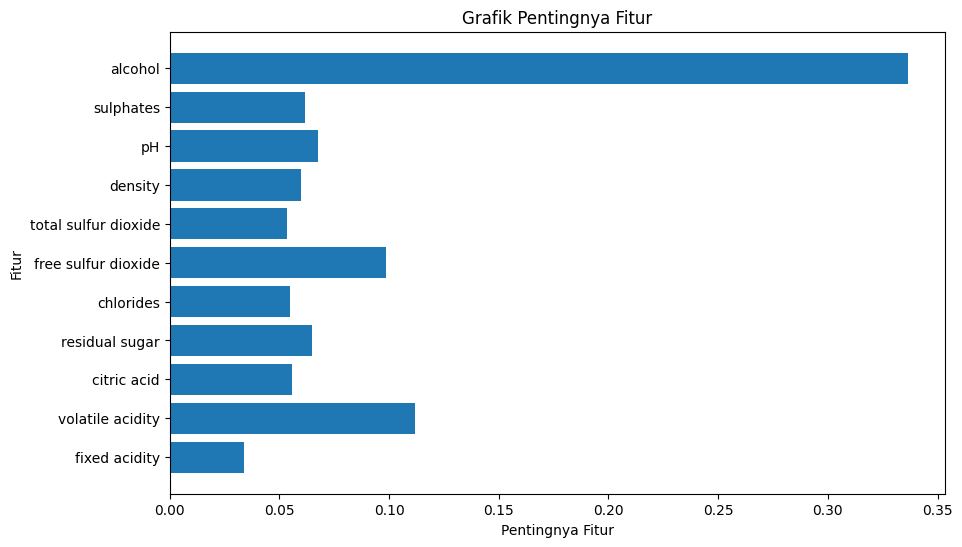

In [16]:
plt.figure(figsize=(10, 6))
plt.barh(predictors, model.feature_importances_)
plt.xlabel("Pentingnya Fitur")
plt.ylabel("Fitur")
plt.title("Grafik Pentingnya Fitur")
plt.show()
# Membuat plot yang menunjukkan tingkat kepentingan tiap fitur

Fitur dengan kontribusi signifikan, seperti alkohol, menunjukkan hubungan positif yang kuat dengan kualitas anggur, yang berarti anggur dengan kadar alkohol yang lebih tinggi cenderung memiliki kualitas yang lebih baik.

Fitur lain, seperti sulphates, mungkin berhubungan dengan persepsi rasa yang lebih intens atau stabilitas anggur, sedangkan pH mencerminkan tingkat keasaman yang dapat memengaruhi rasa dan kualitas secara keseluruhan.

Fitur seperti density dan total sulfur dioxide memberikan informasi tambahan terkait sifat fisik dan kandungan pengawet anggur, meskipun pengaruhnya tergolong kecil.

Sementara itu, fitur dengan kontribusi yang lebih rendah, seperti fixed acidity dan volatile acidity, masih menyumbangkan informasi, meskipun dalam proporsi yang lebih kecil. Fitur-fitur ini berfungsi sebagai pelengkap yang membantu model untuk memahami faktor-faktor yang memengaruhi kualitas anggur secara lebih menyeluruh.








#Tree Structure Visualization

<Figure size 5000x2000 with 0 Axes>

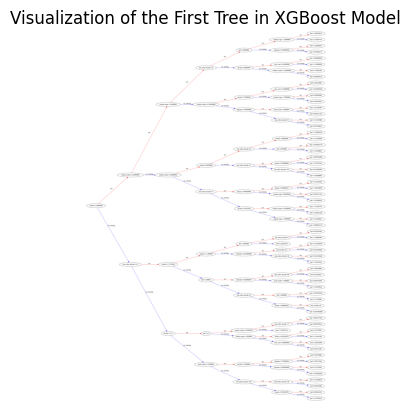

In [17]:
plt.figure(figsize=(50, 20))
plot_tree(model, num_trees=0, rankdir='LR')  # num_trees=0 memilih pohon pertama
plt.title("Visualization of the First Tree in XGBoost Model")
plt.show()
# Visualisasi struktur pohon

Visualisasi struktur pohon pada XGBoost memberikan gambaran mendalam tentang bagaimana model mengambil keputusan dalam memprediksi nilai target.

Setiap node menggambarkan aturan pemisahan yang didasarkan pada fitur tertentu dan nilai pemisahan tersebut. Cabang-cabang menunjukkan keputusan yang dibuat berdasarkan kondisi pemisahan. Daun (leaf nodes) mewakili hasil prediksi akhir. Visualisasi ini membantu memahami logika di balik model dan meningkatkan transparansi mengenai cara fitur digunakan untuk menghasilkan prediksi.

#Learning Curve Visualization

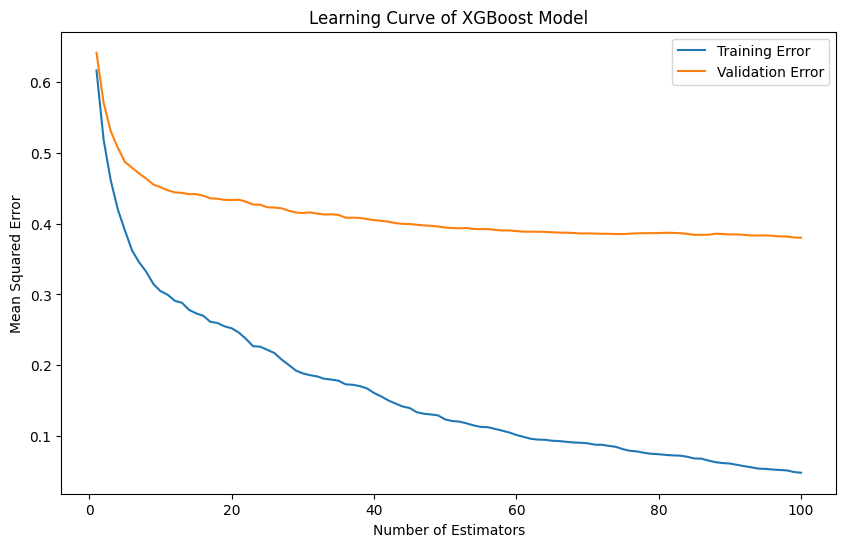

In [18]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)
# Membagi data menjadi set pelatihan dan set validasi dengan proporsi 80:20

train_errors = []
valid_errors = []
# Menyimpan nilai kesalahan untuk set pelatihan dan set validasi selama iterasi

for n_estimators in range(1, 101):  # Menyesuaikan rentang jumlah estimators sesuai kebutuhan
    model = XGBRegressor(n_estimators=n_estimators, random_state=42)
    model.fit(X_train, y_train)

    # Melakukan prediksi dan menghitung error pada data pelatihan dan validasi
    train_pred = model.predict(X_train)
    valid_pred = model.predict(X_valid)

    train_errors.append(mean_squared_error(y_train, train_pred))
    valid_errors.append(mean_squared_error(y_valid, valid_pred))
# Membangun model XGBRegressor dan melatihnya dengan jumlah estimators yang bertambah

plt.figure(figsize=(10, 6))
plt.plot(range(1, 101), train_errors, label="Training Error")
plt.plot(range(1, 101), valid_errors, label="Validation Error")
plt.xlabel("Number of Estimators")
plt.ylabel("Mean Squared Error")
plt.title("Learning Curve of XGBoost Model")
plt.legend()
plt.show()
# Menampilkan kurva pembelajaran untuk membandingkan kesalahan pelatihan dan validasi

Kurva pembelajaran menggambarkan kinerja model XGBoost pada data pelatihan dan validasi seiring dengan bertambahnya jumlah data pelatihan. Grafik ini sangat berguna untuk mengevaluasi apakah model mengalami overfitting atau underfitting. Jika error pada data pelatihan rendah namun error pada data validasi tinggi, ini bisa mengindikasikan overfitting. Sebaliknya, jika error pada kedua set data tinggi, maka model mungkin mengalami underfitting. Selain itu, grafik ini juga memperlihatkan titik di mana model mulai mencapai kestabilan, yaitu ketika penambahan data pelatihan tidak memberikan peningkatan kinerja yang signifikan. Informasi ini membantu dalam menentukan ukuran dataset yang paling optimal.

#Shap Values Visualization

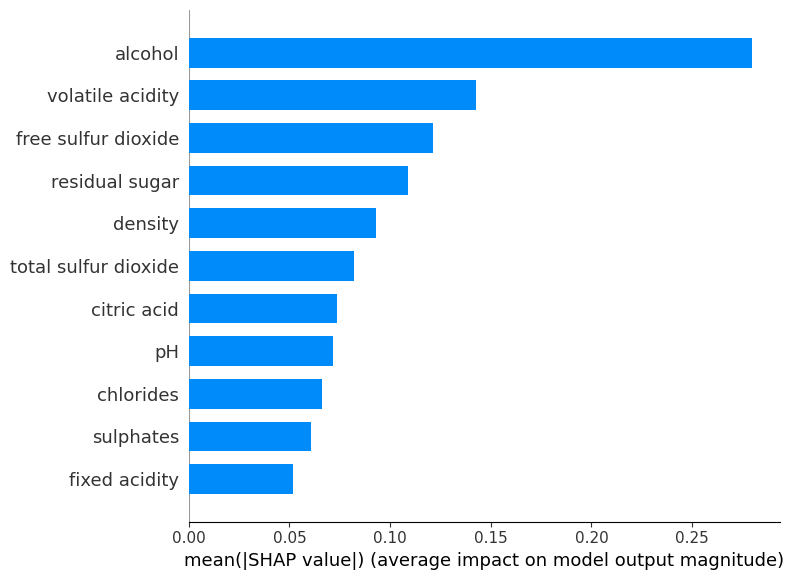

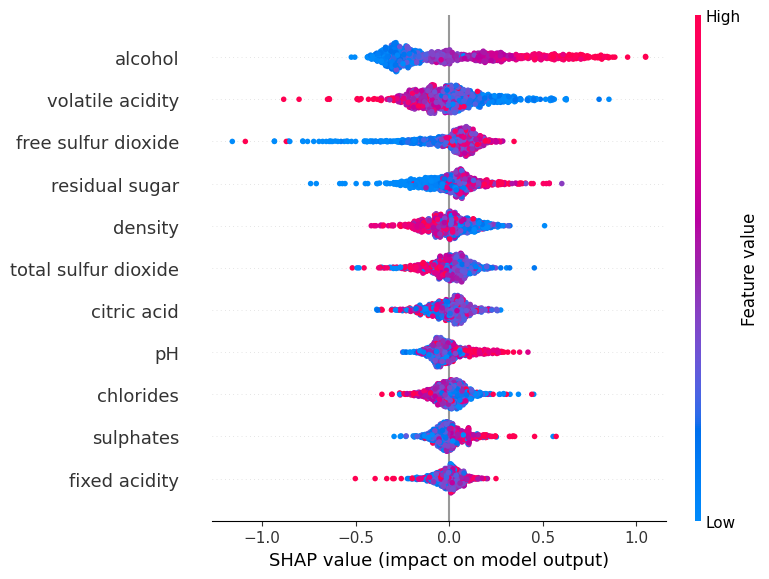

In [19]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)
# Membagi data menjadi set pelatihan (X_train, y_train) dan set validasi (X_valid, y_valid) dengan proporsi 80:20

model = XGBRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
# Melatih model XGBoost menggunakan data pelatihan

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_valid)
# Membuat objek penjelas SHAP dan menghitung nilai SHAP untuk set validasi

shap.summary_plot(shap_values, X_valid, plot_type="bar", show=True)
shap.summary_plot(shap_values, X_valid, show=True)
# Menampilkan plot ringkasan untuk visualisasi nilai SHAP dengan dua jenis tampilan

Visualisasi nilai SHAP memberikan pemahaman mengenai seberapa besar dan arah pengaruh setiap fitur terhadap prediksi model XGBoost. Pada plot ringkasan SHAP, setiap titik mewakili satu observasi untuk suatu fitur, dengan sumbu horizontal yang menunjukkan dampak fitur terhadap prediksi, sedangkan warna titik mencerminkan nilai fitur (dari rendah ke tinggi). Plot ini membantu dalam mengidentifikasi fitur yang paling berpengaruh dan memahami bagaimana kontribusinya, baik yang bersifat positif maupun negatif, terhadap hasil prediksi. Hal ini meningkatkan transparansi dan pemahaman tentang model machine learning yang kompleks.

#Partial Dependence Plot Visualization

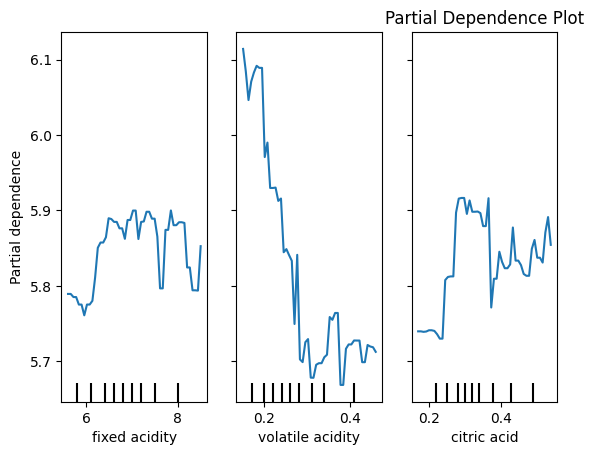

In [20]:
features_to_plot = [0, 1, 2]
PartialDependenceDisplay.from_estimator(
    model,
    X_val,
    features=features_to_plot,
    grid_resolution=50
)
plt.title("Partial Dependence Plot")
plt.show()
# Menampilkan grafik Dependensi Parsial untuk beberapa variabel fitur

Kadar alkohol yang lebih tinggi sering kali dikaitkan dengan karakteristik tubuh anggur yang lebih kuat, yang dapat meningkatkan kualitas anggur. Sementara itu, fitur seperti residual sugar hanya menunjukkan sedikit peningkatan pada kualitas, meskipun pengaruhnya bisa bervariasi tergantung pada jenis anggur. Fitur density sering kali berkorelasi erat dengan kadar gula dan alkohol, sehingga perubahan kecil dalam kepadatan dapat mempengaruhi persepsi kualitas secara tidak langsung, meskipun pengaruhnya dalam model cenderung tidak begitu signifikan. Secara keseluruhan, analisis PDP ini membantu untuk memahami pengaruh masing-masing fitur terhadap prediksi model secara terpisah, serta memberikan panduan dalam menyoroti karakteristik yang paling berpengaruh dalam menentukan kualitas anggur.